<a href="https://colab.research.google.com/github/kislaykaushik1/Image-Classification-Using-CNN-Basic-/blob/main/Image_Classification_Using_CNN_(Basic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras import models,datasets,layers
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

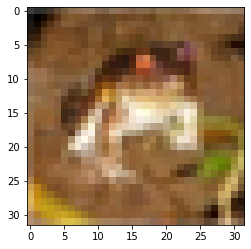

In [3]:
plt.imshow(x_train[0])

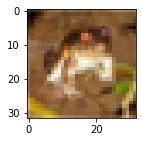

In [4]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[0])

In [5]:
y_train.shape

(50000, 1)

In [6]:
#as we need direct category so we dont need 2d array so we will reshape it to 1d array
y_train=y_train.reshape(-1,)

In [7]:
#normalizing
x_train=x_train/255
x_test=x_test/255

In [8]:
cnn=models.Sequential([
                       layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
                       layers.MaxPooling2D((3,3)),

                       layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                       layers.MaxPooling2D((2,2)),

                        layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
                       layers.MaxPooling2D((2,2)),

                       layers.Flatten(),
                       layers.Dense(128,activation='relu'),
                       layers.Dense(10,activation='softmax')
                       
])
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
cnn.fit(x_train,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 45s 28ms/step - loss: 1.5407 - accuracy: 0.4329
Epoch 2/15
1563/1563 [==============================] - 44s 28ms/step - loss: 1.1645 - accuracy: 0.5842
Epoch 3/15
1563/1563 [==============================] - 46s 30ms/step - loss: 0.9954 - accuracy: 0.6488
Epoch 4/15
1563/1563 [==============================] - 46s 30ms/step - loss: 0.8915 - accuracy: 0.6860
Epoch 5/15
1563/1563 [==============================] - 48s 30ms/step - loss: 0.8078 - accuracy: 0.7181
Epoch 6/15
1563/1563 [==============================] - 46s 30ms/step - loss: 0.7488 - accuracy: 0.7385
Epoch 7/15
1563/1563 [==============================] - 47s 30ms/step - loss: 0.6879 - accuracy: 0.7564
Epoch 8/15
1563/1563 [==============================] - 47s 30ms/step - loss: 0.6370 - accuracy: 0.7769
Epoch 9/15
1563/1563 [==============================] - 46s 29ms/step - loss: 0.5957 - accuracy: 0.7899
Epoch 10/15
1563/1563 [==============================] - 45s 29m

In [9]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.0559 - accuracy: 0.7020


[1.0559228658676147, 0.7020000219345093]

In [10]:
#predict 
y_pred=cnn.predict(x_test)
y_pred[:5]

array([[1.6834469e-05, 2.0371134e-08, 3.1463334e-03, 9.9065548e-01,
        2.6143687e-06, 2.4030022e-03, 2.6840209e-03, 7.7991077e-04,
        3.1156559e-04, 2.1587864e-07],
       [6.6870684e-04, 3.3531733e-02, 1.1304698e-07, 1.7034354e-06,
        7.8150816e-07, 2.6267295e-09, 7.1031492e-09, 2.6548820e-08,
        9.6444792e-01, 1.3489448e-03],
       [1.4099720e-01, 2.8742997e-03, 1.3815637e-02, 1.0286796e-02,
        6.0465658e-04, 5.1739934e-04, 1.6847561e-03, 1.0789670e-03,
        8.1879151e-01, 9.3488861e-03],
       [9.8535919e-01, 1.0802486e-03, 1.2454384e-03, 4.0793247e-03,
        3.1287004e-03, 1.0240213e-04, 1.1844060e-04, 8.4964122e-06,
        4.5275409e-03, 3.5024266e-04],
       [1.2002999e-08, 1.7092662e-08, 5.4433402e-03, 3.2968710e-03,
        7.3755361e-02, 3.9725663e-05, 9.1746455e-01, 2.0787995e-08,
        3.0363115e-08, 2.2731197e-09]], dtype=float32)

In [16]:
#as we have to find the max element in each prediction
y_img=[np.argmax(element) for element in y_pred]
y_img[:10]

[3, 8, 8, 0, 6, 6, 3, 6, 3, 1]

In [15]:
#lets compare
y_test[:10]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1]], dtype=uint8)

In [22]:
#lets check first 15 element
for i in range (15):
  if(y_test[i]==y_img[i]):
    print("correct prediction ",i)
  else:
    print(" wrong prediction  ",i)


correct prediction  0
correct prediction  1
correct prediction  2
correct prediction  3
correct prediction  4
correct prediction  5
 wrong prediction   6
correct prediction  7
correct prediction  8
correct prediction  9
 wrong prediction   10
correct prediction  11
 wrong prediction   12
correct prediction  13
correct prediction  14


In [12]:
classes=['aeroplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

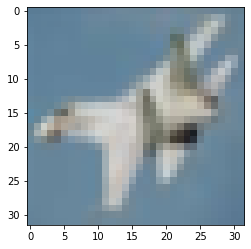

In [34]:
#actual image 
plt.imshow(x_test[10])

In [33]:
#predicted 
classes[y_img[10]]

'deer'

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_img))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74      1000
           1       0.79      0.85      0.82      1000
           2       0.56      0.67      0.61      1000
           3       0.49      0.61      0.54      1000
           4       0.64      0.70      0.67      1000
           5       0.77      0.42      0.54      1000
           6       0.73      0.80      0.77      1000
           7       0.78      0.72      0.75      1000
           8       0.86      0.77      0.81      1000
           9       0.89      0.67      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.72      0.70      0.70     10000
weighted avg       0.72      0.70      0.70     10000

